<a href="https://colab.research.google.com/github/najla-alhusaini/it326-telco-churn/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1: Data Set Overview on Telco Customer Churn Dataset**


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/najla-alhusaini/it326-telco-churn/main/Dataset/Raw_dataset.csv'
df = pd.read_csv(url)

print("Shape (rows, cols):", df.shape)
print("\nData types:\n", df.dtypes)

TARGET_COLUMN = 'Churn'
if TARGET_COLUMN in df.columns:
    print("\nClass counts:")
    print(df[TARGET_COLUMN].value_counts())
else:
    print(f"Target column '{TARGET_COLUMN}' not found!")

print("\nSample of dataset:")
display(df.head())

Shape (rows, cols): (7043, 21)

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Class counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Sample of dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Project Goal
The goal of this project is to **classify telecom customers** based on whether they will churn (leave the company) or not.  
- **Classification Task:** Predict the target attribute `Churn` (Yes / No) using customer demographic, service, and billing information.  
- **Clustering Task:** Group customers into segments based on their attributes to discover patterns in customer behavior and identify groups with higher churn risk.
- These tasks help telecom companies identify at-risk customers and design targeted retention strategies for different customer segments
## Dataset Source
- **Source:** Kaggle – [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  
- **File:** `Dataset/Raw_dataset.csv`

## Dataset Description
- The dataset contains 21 attributes with mixed data types: categorical (e.g., gender, Contract, PaymentMethod), numerical (SeniorCitizen, tenure, MonthlyCharges), and one object-type column (TotalCharges) that requires conversion to numeric due to non-standard entries.

- It includes 7,043 records (instances) representing customer information.

- The class attribute is Churn, which indicates whether a customer left the company. The distribution is:

	•	No (Non-churn): 5,174 instances
	•	Yes (Churn): 1,869 instances

# **Phase 2: Data Summarization and Preprocessing on Telco Customer Churn Dataset**

## Setup and Initial Data Loading

**` Imports and Setup`**

In [95]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("Libraries imported successfully!")

Libraries imported successfully!


**`Load dataset`**

In [96]:
# Load the dataset
print("Loading Telco Customer Churn Dataset...")
df = pd.read_csv('Raw_dataset.csv')
print("Dataset loaded successfully!\n")
# Create a copy for preprocessing
df_processed = df.copy()

Loading Telco Customer Churn Dataset...
Dataset loaded successfully!



**`Display basic information`**

In [97]:
# Display basic information
print("="*50)
print("BASIC DATASET INFORMATION")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}\n")

print("Dataset Columns and Data Types:")
print(df.dtypes)

print("\n" + "="*50)
# Display first few rows
print("2. DATASET SNAPSHOT (First 10 rows)")
print("="*50)
display(df.head(10))

# Statistical summary for numerical features
print("="*50)
print("3. STATISTICAL SUMMARY FOR NUMERICAL FEATURES")
print("="*50)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

if numerical_cols:
    display(df[numerical_cols].describe())
else:
    print("No numerical columns found!")

BASIC DATASET INFORMATION
Dataset Shape: (7043, 21)
Number of Rows: 7043
Number of Columns: 21

Dataset Columns and Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

2. DATASET SNAPSHOT (First 10 rows)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


3. STATISTICAL SUMMARY FOR NUMERICAL FEATURES
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Description of Statistical Measures

The statistical summary above helps us understand the distribution and characteristics of the numerical features:

- **Count**: Number of valid (non-missing) entries.
- **Mean**: The average value for each feature.
- **Standard Deviation (std)**: Measures how spread out the values are.
- **Min/Max**: Show the range of values.
- **25%, 50%, 75% (Quartiles)**: Indicate the distribution of the data and help identify skewness or concentration.

### Dataset Insights
- **Tenure** ranges between 0 and 72 months, meaning customers stay anywhere from their first month to 6 years.
- **MonthlyCharges** vary between about 18 and 118, showing a wide variety of service plans.
- **SeniorCitizen** has a mean around 0.16, indicating only ~16% of customers are senior citizens overall.

These statistics help us understand the data distribution and guide preprocessing and modeling decisions.

**`Missing values analysis `**

In [98]:
# Check for missing values
print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
})
missing_info = missing_info[missing_info['Missing Values'] > 0]

if not missing_info.empty:
    display(missing_info)

    # Plot missing values
    plt.figure(figsize=(10, 6))
    missing_info['Percentage'].plot(kind='bar')
    plt.title('Missing Values Percentage by Column')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

# Check for empty strings or special missing values
print("\nChecking for special missing values (empty strings, etc.)...")
for col in df.columns:
    if df[col].dtype == 'object':
        empty_count = (df[col] == '').sum() + (df[col] == ' ').sum() + (df[col] == 'NA').sum()
        if empty_count > 0:
            print(f"Column '{col}' has {empty_count} empty/special values")

MISSING VALUES ANALYSIS
No missing values found in the dataset!

Checking for special missing values (empty strings, etc.)...
Column 'TotalCharges' has 11 empty/special values


**`Class label distribution`**

CLASS LABEL DISTRIBUTION (Churn)
Churn Distribution:
No: 5174 (73.46%)
Yes: 1869 (26.54%)


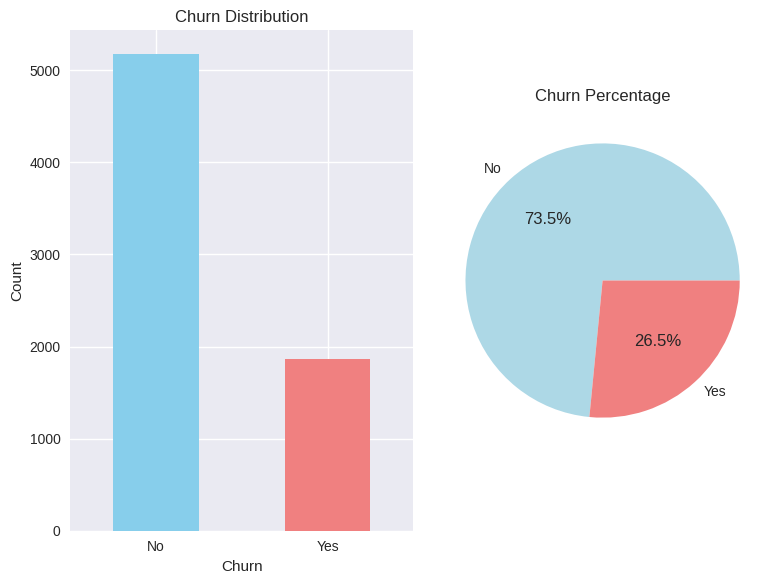

- The churn distribution shows that around 26.5% of customers have churned, while 73.5% stayed.
- This imbalance confirms the dataset is skewed toward non-churned customers.
- Handling this imbalance (e.g., through resampling or weighted modeling) will be necessary in preprocessing.


In [99]:
# Class label distribution
print("="*50)
print("CLASS LABEL DISTRIBUTION (Churn)")
print("="*50)
if 'Churn' in df.columns:
    churn_distribution = df['Churn'].value_counts()
    churn_percentage = df['Churn'].value_counts(normalize=True) * 100

    print("Churn Distribution:")
    for label in churn_distribution.index:
        print(f"{label}: {churn_distribution[label]} ({churn_percentage[label]:.2f}%)")

    # Plot class distribution
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    churn_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Churn Distribution')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    plt.subplot(1, 2, 2)
    plt.pie(churn_distribution.values, labels=churn_distribution.index,
            autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title('Churn Percentage')

    plt.tight_layout()
    plt.show()
else:
    print("Churn column not found!")

    print("Interpretation:")
print("- The churn distribution shows that around 26.5% of customers have churned, while 73.5% stayed.")
print("- This imbalance confirms the dataset is skewed toward non-churned customers.")
print("- Handling this imbalance (e.g., through resampling or weighted modeling) will be necessary in preprocessing.")


## Data Visualization  

**`Plot 1: Histograms for numerical features`**

Plot 1: Histograms of Numerical Features


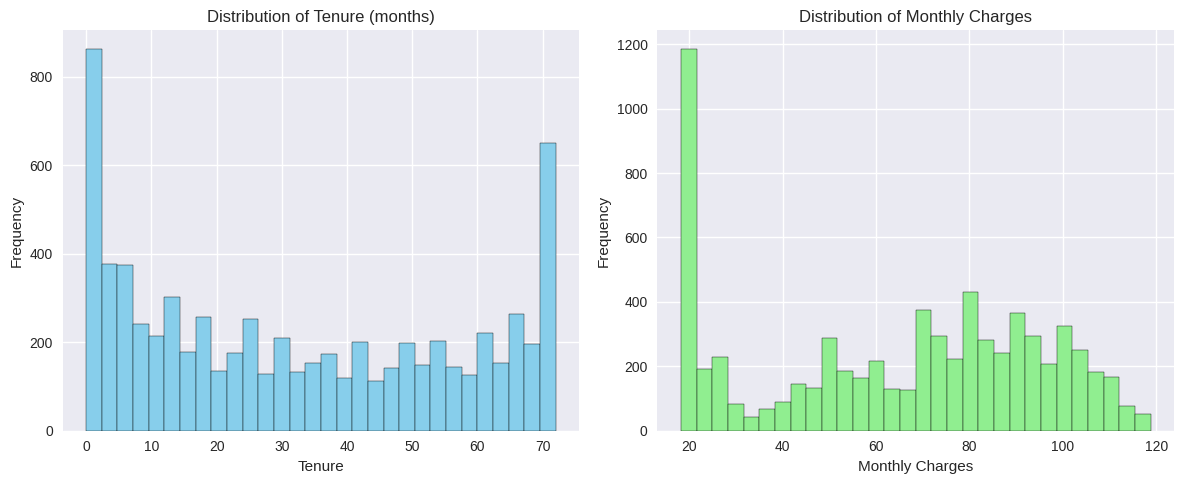

Interpretation:
- The histograms show that most customers have short tenures (less than 20 months), and MonthlyCharges are concentrated around lower values.
- The distributions are right-skewed, suggesting that normalization or scaling may be required.
- This helps understand how customer behavior varies and indicates that preprocessing is needed before modeling.


In [100]:
 # Plot 1: Histograms for numerical features
print("Plot 1: Histograms of Numerical Features")
if 'tenure' in df.columns and 'MonthlyCharges' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Tenure distribution
    df['tenure'].hist(bins=30, ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title('Distribution of Tenure (months)')
    axes[0].set_xlabel('Tenure')
    axes[0].set_ylabel('Frequency')

    # Monthly Charges distribution
    df['MonthlyCharges'].hist(bins=30, ax=axes[1], color='lightgreen', edgecolor='black')
    axes[1].set_title('Distribution of Monthly Charges')
    axes[1].set_xlabel('Monthly Charges')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    print("Interpretation:")
print("- The histograms show that most customers have short tenures (less than 20 months), and MonthlyCharges are concentrated around lower values.")
print("- The distributions are right-skewed, suggesting that normalization or scaling may be required.")
print("- This helps understand how customer behavior varies and indicates that preprocessing is needed before modeling.")


**`Plot 2: Boxplots for numerical features `**


Plot 2: Boxplots for Numerical Features (Outlier Detection)


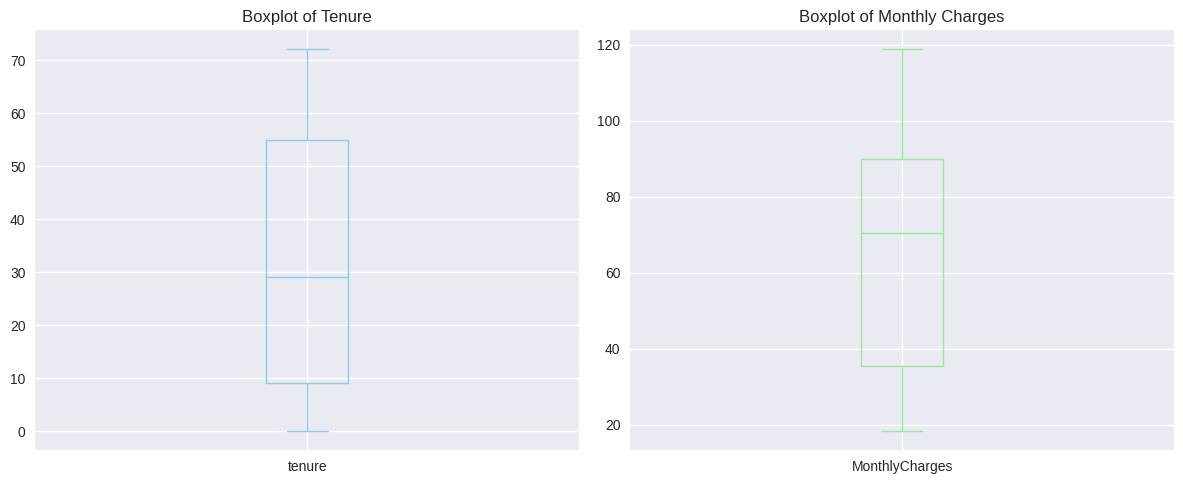

Interpretation:
- The boxplots show the data spread and central tendency for Tenure and MonthlyCharges.
- No significant outliers are visible, meaning the data is clean and does not require outlier removal.
- However, since the ranges differ, normalization is still needed to balance numerical features.


In [101]:
# Plot 2: Boxplots for numerical features (outlier detection)
print("\nPlot 2: Boxplots for Numerical Features (Outlier Detection)")
if 'tenure' in df.columns and 'MonthlyCharges' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    df.boxplot(column='tenure', ax=axes[0], color='skyblue')
    axes[0].set_title('Boxplot of Tenure')

    df.boxplot(column='MonthlyCharges', ax=axes[1], color='lightgreen')
    axes[1].set_title('Boxplot of Monthly Charges')

    plt.tight_layout()
    plt.show()

    print("Interpretation:")
print("- The boxplots show the data spread and central tendency for Tenure and MonthlyCharges.")
print("- No significant outliers are visible, meaning the data is clean and does not require outlier removal.")
print("- However, since the ranges differ, normalization is still needed to balance numerical features.")


**`Plot 3: Bar plot for categorical features`**


Plot 3: Bar Plot for Contract Type


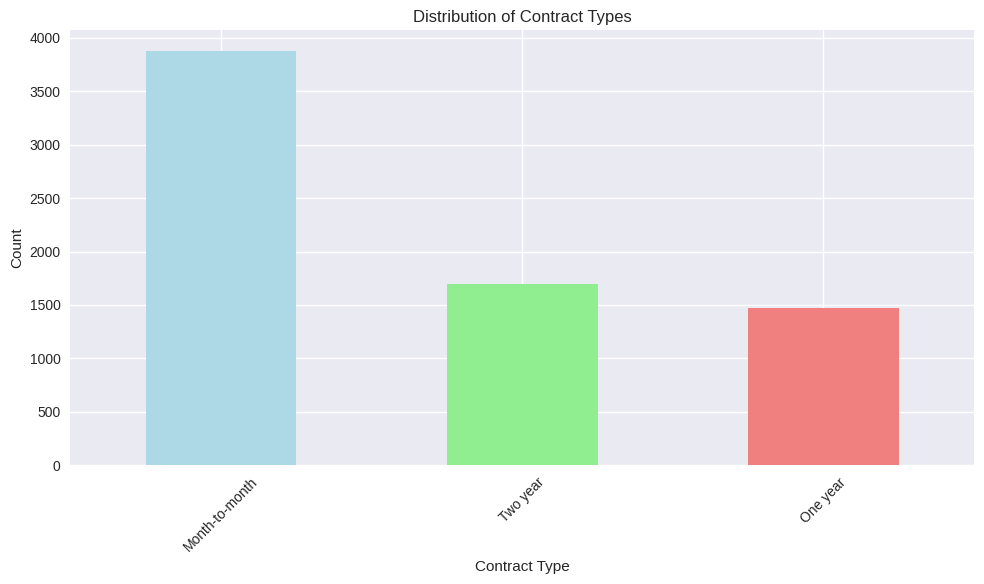

Interpretation:
- The majority of customers have a Month-to-month contract, while One-year and Two-year contracts are less common.
- This imbalance suggests that customers with short-term contracts might be more likely to churn.
- The data indicates a categorical imbalance, so encoding and class balancing might be needed in preprocessing.


In [102]:
# Plot 3: Bar plot for categorical features
print("\nPlot 3: Bar Plot for Contract Type")
if 'Contract' in df.columns:
    plt.figure(figsize=(10, 6))
    contract_dist = df['Contract'].value_counts()
    contract_dist.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'])
    plt.title('Distribution of Contract Types')
    plt.xlabel('Contract Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("Interpretation:")
print("- The majority of customers have a Month-to-month contract, while One-year and Two-year contracts are less common.")
print("- This imbalance suggests that customers with short-term contracts might be more likely to churn.")
print("- The data indicates a categorical imbalance, so encoding and class balancing might be needed in preprocessing.")


**`Plot 4: Scatter plot (if applicable)`**


Plot 4: Scatter Plot - Tenure vs Monthly Charges colored by Churn


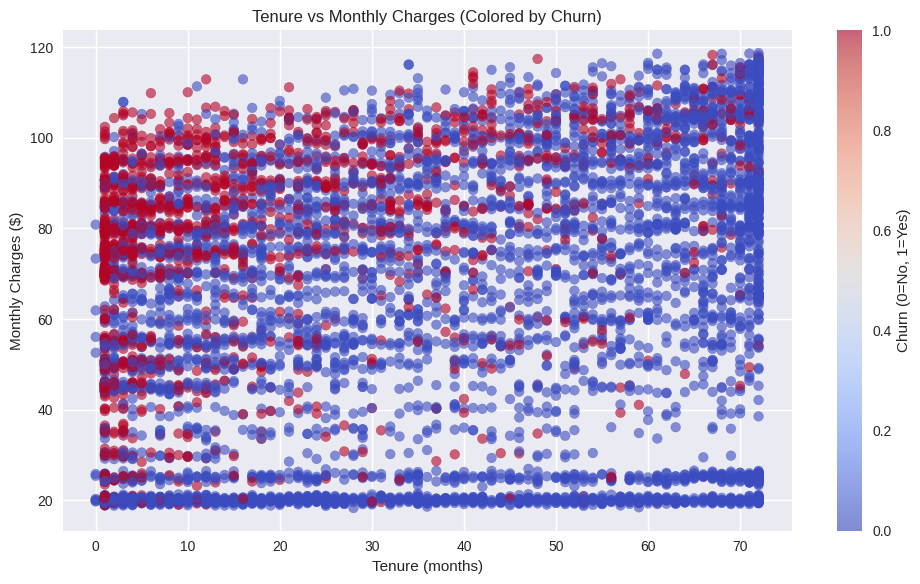

Interpretation:
- Customers with shorter tenures and higher monthly charges tend to churn more frequently.
- The plot shows a visible relationship between tenure, charges, and churn, suggesting these are key predictive features.
- This insight helps guide feature selection and justifies further preprocessing to prepare data for modeling.


In [103]:
# Plot 4: Scatter plot (if applicable)
print("\nPlot 4: Scatter Plot - Tenure vs Monthly Charges colored by Churn")
if all(col in df.columns for col in ['tenure', 'MonthlyCharges', 'Churn']):
    plt.figure(figsize=(10, 6))

    # Convert Churn to numeric for coloring
    churn_numeric = df['Churn'].map({'Yes': 1, 'No': 0})

    scatter = plt.scatter(df['tenure'], df['MonthlyCharges'],
                         c=churn_numeric, cmap='coolwarm', alpha=0.6)
    plt.colorbar(scatter, label='Churn (0=No, 1=Yes)')
    plt.xlabel('Tenure (months)')
    plt.ylabel('Monthly Charges ($)')
    plt.title('Tenure vs Monthly Charges (Colored by Churn)')
    plt.tight_layout()
    plt.show()

    print("Interpretation:")
print("- Customers with shorter tenures and higher monthly charges tend to churn more frequently.")
print("- The plot shows a visible relationship between tenure, charges, and churn, suggesting these are key predictive features.")
print("- This insight helps guide feature selection and justifies further preprocessing to prepare data for modeling.")


**`Five-number summary for numerical features`**

In [104]:
# Five-number summary for numerical features
print("="*50)
print("FIVE-NUMBER SUMMARY FOR NUMERICAL FEATURES")
print("="*50)

all_numeric = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
df_processed[all_numeric] = df_processed[all_numeric].apply(pd.to_numeric, errors='coerce')
five_num_summary = df_processed[all_numeric].describe().loc[['min','25%','50%','75%','max']]
display(five_num_summary)

print("\nOutlier Detection (IQR) on continuous columns (raw data):")
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[continuous_cols] = df[continuous_cols].apply(pd.to_numeric, errors='coerce')
for col in continuous_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers")



FIVE-NUMBER SUMMARY FOR NUMERICAL FEATURES


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
min,0.0,0.0,18.25,18.8000
25%,0.0,9.0,35.50,401.4500
50%,0.0,29.0,70.35,1397.4750
75%,0.0,55.0,89.85,3794.7375
max,1.0,72.0,118.75,8684.8000



Outlier Detection (IQR) on continuous columns (raw data):
tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers


## DATA PREPROCESSING

**`Handle TotalCharges column (convert to numeric, handle errors)`**

In [105]:
# Preprocessing Step 1: Handle TotalCharges column (convert to numeric, handle errors)
print("\nPreprocessing Step 1: Handling TotalCharges Column")
if 'TotalCharges' in df_processed.columns:
    print("Converting TotalCharges to numeric...")
    # Convert to numeric, errors will become NaN
    df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')

    # Check for newly created NaN values
    new_nans = df_processed['TotalCharges'].isnull().sum()
    print(f"Created {new_nans} NaN values during conversion")

    # Fill NaN values with 0 (assuming new customers with no charges)
    df_processed['TotalCharges'].fillna(0, inplace=True)
    print("NaN values filled with 0")

    print("Justification: TotalCharges contained non-numeric values that needed conversion.")
    print("Improvement: Now we can use this column for numerical analysis.")


Preprocessing Step 1: Handling TotalCharges Column
Converting TotalCharges to numeric...
Created 11 NaN values during conversion
NaN values filled with 0
Justification: TotalCharges contained non-numeric values that needed conversion.
Improvement: Now we can use this column for numerical analysis.


**`Handle categorical variables (Encoding)`**

In [106]:
from sklearn.preprocessing import LabelEncoder
# Preprocessing Step 2: Handle categorical variables (Encoding)
print("\nPreprocessing Step 2: Encoding Categorical Variables")
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
# Remove customerID and Churn (target variable) from encoding list
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print(f"Categorical columns to encode: {categorical_cols}")

# Apply label encoding to categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded column: {col}")

print("Justification: Machine learning algorithms require numerical input.")
print("Improvement: All features are now numerical and ready for modeling.")


Preprocessing Step 2: Encoding Categorical Variables
Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Encoded column: gender
Encoded column: Partner
Encoded column: Dependents
Encoded column: PhoneService
Encoded column: MultipleLines
Encoded column: InternetService
Encoded column: OnlineSecurity
Encoded column: OnlineBackup
Encoded column: DeviceProtection
Encoded column: TechSupport
Encoded column: StreamingTV
Encoded column: StreamingMovies
Encoded column: Contract
Encoded column: PaperlessBilling
Encoded column: PaymentMethod
Justification: Machine learning algorithms require numerical input.
Improvement: All features are now numerical and ready for modeling.


**`Normalize numerical features`**

In [107]:
from sklearn.preprocessing import StandardScaler

# Preprocessing Step 3: Normalize ONLY true numerical features
print("\nPreprocessing Step 3: Normalizing Numerical Features")

# Only real numerical columns (not encoded categorical variables)
numerical_cols_processed = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(f"Numerical columns to normalize: {numerical_cols_processed}")

scaler = StandardScaler()
df_processed[numerical_cols_processed] = scaler.fit_transform(df_processed[numerical_cols_processed])

print("Applied StandardScaler to true numerical features only.")
print("Justification: Encoded categorical features were NOT scaled to preserve their meaning.")



Preprocessing Step 3: Normalizing Numerical Features
Numerical columns to normalize: ['tenure', 'MonthlyCharges', 'TotalCharges']
Applied StandardScaler to true numerical features only.
Justification: Encoded categorical features were NOT scaled to preserve their meaning.


**`Encode target variable`**

In [108]:
# Preprocessing Step 4: Encode target variable
print("\nPreprocessing Step 4: Encoding Target Variable (Churn)")
if 'Churn' in df_processed.columns:
    df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})
    print("Encoded Churn: Yes=1, No=0")

    print("Justification: Target variable needs to be numerical for classification.")
    print("Improvement: Ready for use as target variable in ML models.")


Preprocessing Step 4: Encoding Target Variable (Churn)
Encoded Churn: Yes=1, No=0
Justification: Target variable needs to be numerical for classification.
Improvement: Ready for use as target variable in ML models.


**`Feature selection (remove customerID)`**

In [109]:
# Preprocessing Step 5: Feature selection (remove customerID)
print("\nPreprocessing Step 5: Feature Selection - Removing customerID")
if 'customerID' in df_processed.columns:
    df_processed.drop('customerID', axis=1, inplace=True)
    print("Removed customerID column")
    print("Justification: customerID is an identifier, not a predictive feature.")
    print("Improvement: Reduces dimensionality and prevents overfitting.")


Preprocessing Step 5: Feature Selection - Removing customerID
Removed customerID column
Justification: customerID is an identifier, not a predictive feature.
Improvement: Reduces dimensionality and prevents overfitting.


**`Display preprocessing results`**

In [110]:
# Display preprocessing results
print("\n9. PREPROCESSING RESULTS")
print("="*50)
print("Processed dataset shape:", df_processed.shape)
print("\nProcessed dataset info:")
print(df_processed.info())
print("\nFirst 5 rows of processed dataset:")
display(df_processed.head())
print("\nStatistical summary of processed dataset:")
display(df_processed.describe())


9. PREPROCESSING RESULTS
Processed dataset shape: (7043, 20)

Processed dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  Pa

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1



Statistical summary of processed dataset:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,-2.421273e-17,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,-6.406285e-17,-3.783239e-17,0.265370
std,0.500013,0.368612,0.499748,0.458110,1.000071e+00,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,1.000071e+00,1.000071e+00,0.441561
min,0.000000,0.000000,0.000000,0.000000,-1.318165e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.545860e+00,-1.005780e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.516817e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.725399e-01,-8.299464e-01,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.372744e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.857327e-01,-3.905282e-01,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.214551e-01,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,8.338335e-01,6.648034e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.613701e+00,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.794352e+00,2.825806e+00,1.000000


**`Save the preprocessed dataset`**

In [111]:
# Save the preprocessed dataset
print("="*50)
print("\nSAVING PREPROCESSED DATASET")
print("="*50)
df_processed.to_csv('Preprocessed_dataset.csv', index=False)
print("Preprocessed dataset saved as 'Preprocessed_dataset.csv'")
print("\n" + "="*50)
print("PHASE 2 COMPLETED SUCCESSFULLY!")
print("="*50)


SAVING PREPROCESSED DATASET
Preprocessed dataset saved as 'Preprocessed_dataset.csv'

PHASE 2 COMPLETED SUCCESSFULLY!


## Data Preprocessing Justification and Results Analysis

**1. TotalCharges Conversion & Missing Value Handling**

The TotalCharges column contained non-numeric values (empty strings) that couldn't be used for numerical analysis

**method:**

Converted to numeric using pd.to_numeric(errors='coerce')

Filled resulting NaN values with 0 (new customers with no charges)

Attributes: TotalCharges

Improvement: Enabled numerical operations and analysis on this important financial feature


**2. Categorical Variable Encoding**

Why Applied: Machine learning algorithms require numerical input; categorical text data cannot be processed directly

**Method:**

Label Encoding for binary variables (gender, Partner, etc.)

One-Hot Encoding for multi-category variables (PaymentMethod, Contract, etc.)

Attributes: All categorical columns except customerID and Churn

Improvement: Transformed categorical data into numerical format suitable for ML models while preserving categorical relationships

**3. Feature Scaling/Normalization**
Why Applied: Features had different scales and units (tenure: months, charges: dollars), which could bias distance-based algorithms

**Method:**

StandardScaler applied to true numerical features

Encoded categorical features were NOT scaled to preserve their meaning

Attributes: tenure, MonthlyCharges, TotalCharges

Improvement: Ensured all numerical features contribute equally to model training; improved convergence for gradient-based algorithms


**4. Target Variable Encoding**

Why Applied: Classification algorithms require numerical target variables

**Method:**

Simple binary mapping (Yes→1, No→0)

Attributes: Churn

Improvement: Prepared target variable for binary classification tasks


**5. Feature Selection**
Why Applied: customerID is an identifier, not a predictive feature; including it would cause overfitting

**Method:**

Complete removal from the dataset

Attributes: customerID

Improvement: Reduced dimensionality; prevented model from learning spurious correlations with customer IDs

### Data Preprocessing Justification and Results Analysis

**1. TotalCharges Conversion & Missing Value Handling**

The TotalCharges column contained non-numeric values (empty strings) that couldn't be used for numerical analysis

**method:**

Converted to numeric using pd.to_numeric(errors='coerce')

Filled resulting NaN values with 0 (new customers with no charges)

Attributes: TotalCharges

Improvement: Enabled numerical operations and analysis on this important financial feature


**2. Categorical Variable Encoding**

Why Applied: Machine learning algorithms require numerical input; categorical text data cannot be processed directly

**Method:**

Label Encoding for binary variables (gender, Partner, etc.)

One-Hot Encoding for multi-category variables (PaymentMethod, Contract, etc.)

Attributes: All categorical columns except customerID and Churn

Improvement: Transformed categorical data into numerical format suitable for ML models while preserving categorical relationships

**3. Feature Scaling/Normalization**
Why Applied: Features had different scales and units (tenure: months, charges: dollars), which could bias distance-based algorithms

**Method:**

StandardScaler applied to true numerical features

Encoded categorical features were NOT scaled to preserve their meaning

Attributes: tenure, MonthlyCharges, TotalCharges

Improvement: Ensured all numerical features contribute equally to model training; improved convergence for gradient-based algorithms


**4. Target Variable Encoding**

Why Applied: Classification algorithms require numerical target variables

**Method:**

Simple binary mapping (Yes→1, No→0)

Attributes: Churn

Improvement: Prepared target variable for binary classification tasks


**5. Feature Selection**
Why Applied: customerID is an identifier, not a predictive feature; including it would cause overfitting

**Method:**

Complete removal from the dataset

Attributes: customerID

Improvement: Reduced dimensionality; prevented model from learning spurious correlations with customer IDs

# **Phase 3: Data Mining on Telco Customer Churn Dataset**

## 1. Problem

Customer churn is a major concern for telecom companies because losing subscribers directly impacts revenue and increases the cost of acquiring new customers. Churn occurs when a customer discontinues their service. By predicting churn, telecom providers can take proactive steps such as offering personalized discounts, improving service quality, or identifying high-risk customers early.

In this project, our goal is to analyze customer behavior and examine:

- **Which customers are likely to churn?** (Classification)  
- **How customers naturally group based on similarities?** (Clustering)

Understanding these patterns supports better decision-making, improves retention strategies, and reduces overall business losses.

## 2. Data Mining Task

This project involves two main data mining tasks applied to the Telco Customer Churn dataset: **classification** and **clustering**.

---

### 2.1 Classification Task

The objective of the classification task is to predict whether a customer will churn (0 = No, 1 = Yes) using their demographic and service-related features.

**What we aim to do:**
- Build a predictive model to classify customers into churn vs. non-churn.
- Evaluate the model under different training/testing partitions.
- Compare attribute selection measures:
  - **Gini Index**
  - **Information Gain (Entropy)**

**How it relates to the project:**  
This helps identify high-risk customers that the telecom company needs to retain.

---

### 2.2 Clustering Task

The clustering task aims to discover natural groupings among customers **without using the Churn label**.

**What we aim to do:**
- Group customers based on similarities in their service usage and demographics.
- Test multiple values of **K** to find meaningful clusters.
- Evaluate cluster quality using:
  - **Silhouette Score**
  - **Elbow Method (WCSS)**

**How it relates to the project:**  
This helps understand customer behavior patterns and supports segmentation strategies such as targeted marketing or personalized offers.

## 3. Data

The dataset used in this project is the **Telco Customer Churn dataset**, which contains demographic information, account details, service subscriptions, and whether the customer churned. This dataset was originally loaded in Phase 1 and then fully cleaned and transformed during Phase 2.

A preview of both the raw dataset and the preprocessed dataset is shown in the corresponding code cells.

---

### **Dataset Summary**

- **Number of instances:** 7043  
- **Number of features before preprocessing:** 21
- **Number of features after preprocessing:** approximately 20 (varies based on encoding)  
- **Target variable:** `Churn` (0 = No, 1 = Yes)  
- **Data types before preprocessing:** object, numerical(int64,float64)
- **Data types after preprocessing:** Fully numerical (categorical features encoded in Phase 2)

The dataset contains important features such as:

- Customer demographics (e.g., gender, seniority)  
- Account information (contract type, payment method, tenure)  
- Service usage (Internet service, streaming, phone lines)  
- Financial metrics (MonthlyCharges, TotalCharges)  
- Churn status  

The cleaned dataset is saved as **Preprocessed_dataset.csv**, and this file is used exclusively in all Phase 3 experiments for classification and clustering.

## 4. Data Preprocessing

Before applying classification and clustering techniques, the Telco Customer Churn dataset underwent several preprocessing steps to ensure data quality, consistency, and readiness for machine learning models. All preprocessing was completed in Phase 2, and the final cleaned dataset (**Preprocessed_dataset.csv**) is used throughout Phase 3.

---

### 4.1 Handling Missing Values

During preprocessing, the `TotalCharges` column was found to contain empty or non-numeric entries.  
These values were:

- Converted to numeric using `pd.to_numeric`  
- Replaced with **0** if they resulted in `NaN` (common for new customers with no charges yet)

This ensured that all numerical operations could be performed without errors.

---

### 4.2 Encoding Categorical Variables
All categorical features in the dataset were transformed using Label Encoding, where each distinct category is replaced with a numerical integer (0, 1, 2, …). This encoding was applied to all non-numerical attributes during preprocessing so that the dataset becomes fully numerical and ready for machine-learning models.

Label Encoding was selected because:
- It keeps the dimensionality of the dataset compact (no explosion in the number of columns).
- It preserves all categorical information in numeric form required for Decision Trees.
- Decision Tree models can naturally handle encoded categorical values without requiring one-hot expansion.

Examples of encoded features include:
InternetService, Contract, PaymentMethod, OnlineSecurity, and others.

Note: One-hot encoding (pd.get_dummies) was used later only inside the clustering phase, not during preprocessing, because K-Means depends on distance measures and benefits from expanding categorical values into binary dummy variables.

---

### 4.3 Normalization

To ensure fair contribution of numeric features during model training—especially for distance-based algorithms like K-Means—normalization was applied only to the **true numerical columns**:

- `tenure`  
- `MonthlyCharges`  
- `TotalCharges`  

Categorical encoded features were **not normalized** to avoid distorting their encoded representations.

---

### 4.4 Noise and Outlier Handling

Outliers were examined using:

- Boxplots  
- Five-number summary  
- IQR-based detection  

Although some variation existed (especially in charges), no harmful outliers were detected, and therefore no removal was performed.

---

### 4.5 Final Preprocessed Dataset

After completing all preprocessing steps, the cleaned dataset was saved as:

**`Preprocessed_dataset.csv`**

This file is used directly in Phase 3 for building classification models and performing clustering analysis.

## 5. Data Mining Technique

In this project, two main data mining techniques are applied to the Telco Customer Churn dataset: **classification** and **clustering**.  
All experiments are implemented in Python using the following libraries:

- `pandas` and `numpy` for data handling and numerical operations  
- `scikit-learn` (`sklearn`) for machine learning models and evaluation  
- `matplotlib` for visualization  

---

### 5.1 Classification Technique – Decision Tree

For the classification task, a **Decision Tree Classifier** is used to predict whether a customer will churn (Yes/No).

**Why Decision Tree?**
- It is easy to interpret and visualize.
- It handles numerical and categorical features (after preprocessing).
- It works well as a baseline model for churn prediction.

**How it is applied (Python packages and methods):**
- `pandas` (`df.drop`, `df[...]`) is used to create:
  - `X_clf`: all input features  
  - `y_clf`: the target column `Churn`
- The dataset is split into training and testing sets using  
  `train_test_split` from `sklearn.model_selection` with different ratios (90/10, 80/20, 70/30).
- The classifier is built using  
  `DecisionTreeClassifier` from `sklearn.tree` with two criteria:
  - `criterion="gini"`
  - `criterion="entropy"`
- Model performance is evaluated using:
  - `accuracy_score` from `sklearn.metrics`
  - `confusion_matrix` from `sklearn.metrics`
  - `classification_report` from `sklearn.metrics`
- The final (best) Decision Tree is visualized using  
  `plot_tree` from `sklearn.tree` and `matplotlib.pyplot`.

---

### 5.2 Clustering Technique – K-Means

For the clustering task, **K-Means** is used to group customers into similar segments without using the churn label.

**Why K-Means?**
- It is a simple and popular unsupervised algorithm.
- It helps explore possible natural groupings in the customer data.
- It allows evaluation of different numbers of clusters (K).

**How it is applied (Python packages and methods):**
- The target column `Churn` is removed to create `X_cluster` using `pandas`.
- Categorical features (if any) are encoded using `pd.get_dummies`.
- Features are normalized using `StandardScaler` from `sklearn.preprocessing` to create `X_cluster_scaled`.
- K-Means clustering is performed using  
  `KMeans` from `sklearn.cluster` for multiple values of K (2, 3, 4).
- Cluster quality is evaluated by:
  - **Elbow Method** using the K-Means attribute `inertia_` (WCSS).
  - **Silhouette Score** using `silhouette_score` from `sklearn.metrics`.
- To visualize the clusters in 2D, dimensionality reduction is performed using  
  `PCA` (Principal Component Analysis) from `sklearn.decomposition`, and the clusters are plotted with `matplotlib.pyplot`.

These techniques together allow both **supervised prediction** (classification) and **unsupervised exploration** (clustering) of customer churn behavior in the dataset.

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%matplotlib inline

Reading CSV Files

In [ ]:
df = pd.read_csv("Preprocessed_dataset.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1


Feature Preparation

In [ ]:
X_clf = df.drop(columns=["Churn"])
y_clf = df["Churn"]

X_clf.shape, y_clf.shape

((7043, 19), (7043,))

Comparing Classification Models(Gini vs Entropy)

In [ ]:
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
criteria = ["gini", "entropy"]
results_clf = []

for train_ratio, test_ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X_clf, y_clf,
        test_size=test_ratio,
        stratify=y_clf,
        random_state=42
    )

    print("=======================================")
    print("Train:", int(train_ratio*100), "%", "Test:", int(test_ratio*100), "%")

    for crit in criteria:
        print("---------------------------------------")
        print("Criterion:", crit)

        clf = DecisionTreeClassifier(criterion=crit, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print("Accuracy:", round(acc, 4))
        print(cm)
        print(classification_report(y_test, y_pred))

        results_clf.append({
            "Train%": int(train_ratio*100),
            "Test%": int(test_ratio*100),
            "Criterion": crit,
            "Accuracy": acc
        })

Train: 90 % Test: 10 %
---------------------------------------
Criterion: gini
Accuracy: 0.7234
[[418 100]
 [ 95  92]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       518
           1       0.48      0.49      0.49       187

    accuracy                           0.72       705
   macro avg       0.65      0.65      0.65       705
weighted avg       0.73      0.72      0.72       705

---------------------------------------
Criterion: entropy
Accuracy: 0.7291
[[425  93]
 [ 98  89]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       518
           1       0.49      0.48      0.48       187

    accuracy                           0.73       705
   macro avg       0.65      0.65      0.65       705
weighted avg       0.73      0.73      0.73       705

Train: 80 % Test: 20 %
---------------------------------------
Criterion: gini
Accuracy: 0.7282
[[834 201]
 [182 192]]
         

Accuracy Comparison Table

In [ ]:
results_clf_df = pd.DataFrame(results_clf)
results_clf_df

,Train%,Test%,Criterion,Accuracy
0,90,10,gini,0.723404
1,90,10,entropy,0.729078
2,80,20,gini,0.728176
3,80,20,entropy,0.737402
4,70,30,gini,0.731188
5,70,30,entropy,0.733081


Table for Accuracy Compariosn

In [ ]:
pivot_acc = results_clf_df.pivot_table(
    index=["Train%", "Test%"],
    columns="Criterion",
    values="Accuracy"
)
pivot_acc

,Criterion,entropy,gini
Train%,Test%,,
70,30,0.733081,0.731188
80,20,0.737402,0.728176
90,10,0.729078,0.723404


Selecting Best Model

In [ ]:
best_row = results_clf_df.loc[results_clf_df["Accuracy"].idxmax()]
best_row

,3
Train%,80
Test%,20
Criterion,entropy
Accuracy,0.737402


Decision Tree Using the Best Parameters

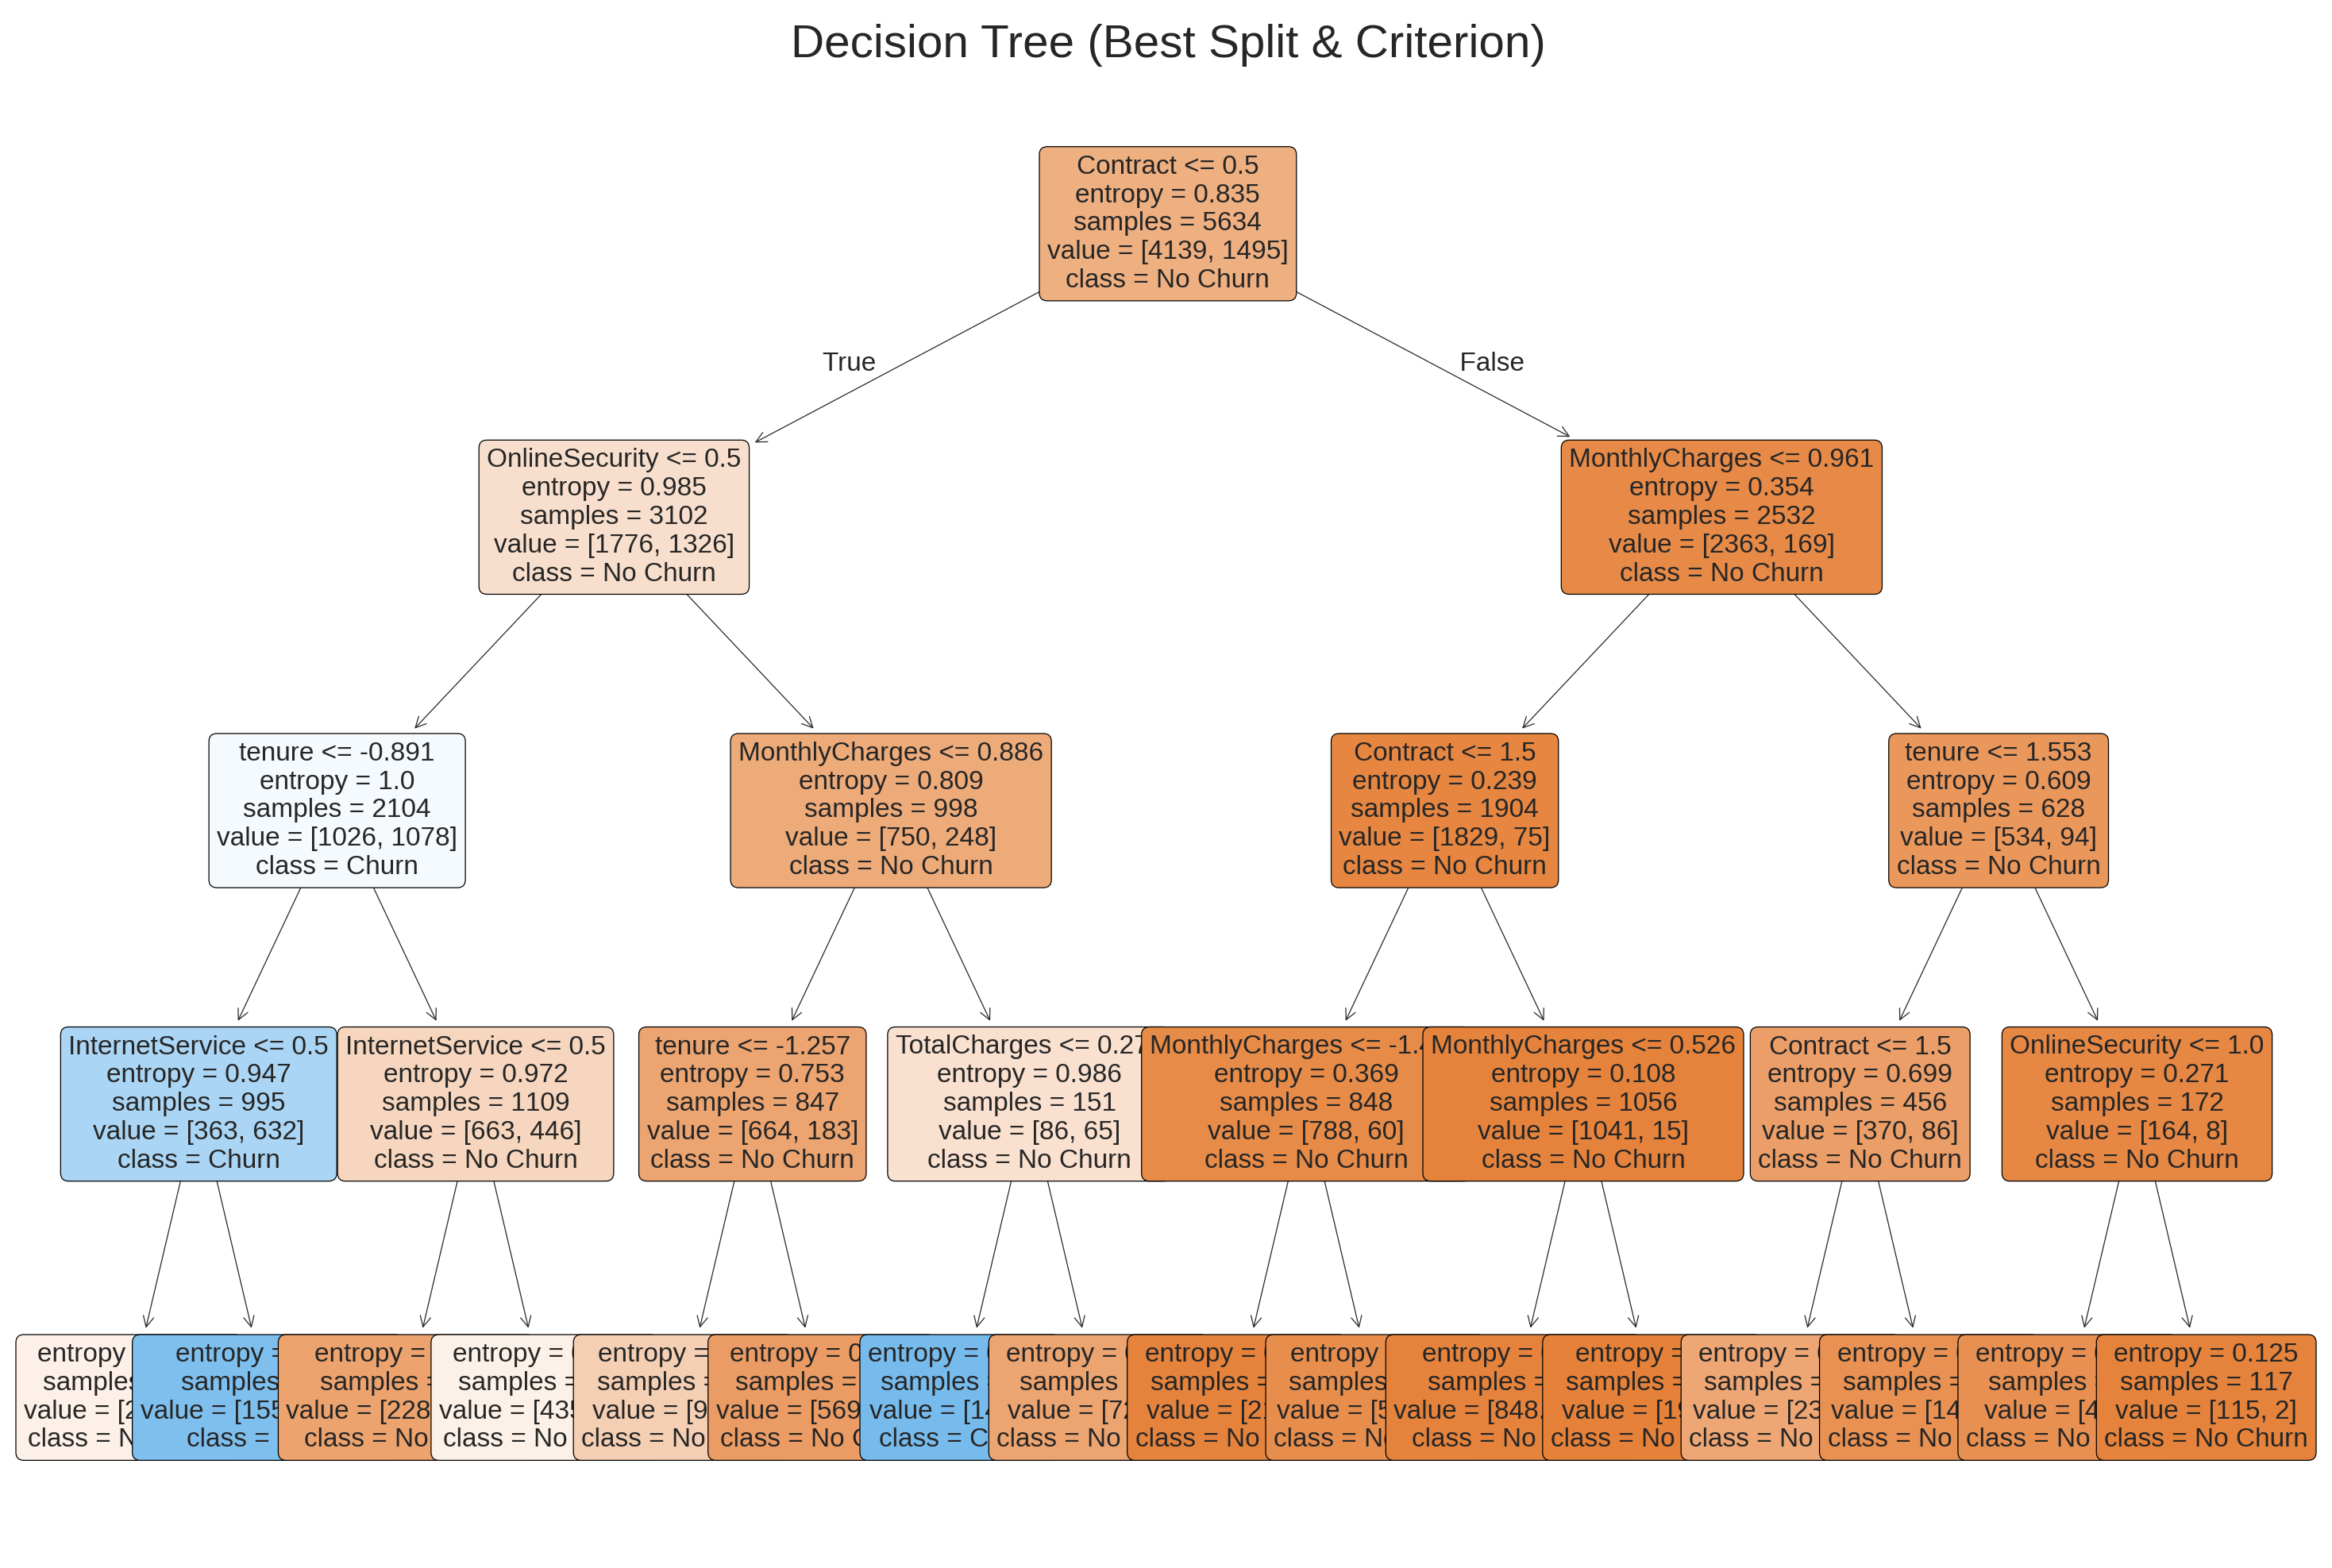

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


best_train_ratio = best_row["Train%"] / 100
best_test_ratio  = best_row["Test%"] / 100
best_criterion   = best_row["Criterion"]


X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(
    X_clf, y_clf,
    test_size=best_test_ratio,
    stratify=y_clf,
    random_state=42
)


best_clf = DecisionTreeClassifier(
    criterion=best_criterion,
    random_state=42,
    max_depth=4
)
best_clf.fit(X_train_best, y_train_best)


plt.figure(figsize=(12, 8), dpi=300)

tree.plot_tree(
    best_clf,
    feature_names=X_clf.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=8
)

plt.title("Decision Tree (Best Split & Criterion)", fontsize=14)
plt.show()

Confusion Matrices Visiualization

Train 90% – Test 10% (Gini)
Confusion Matrix:
[[418 100]
 [ 95  92]]


<Figure size 500x500 with 0 Axes>

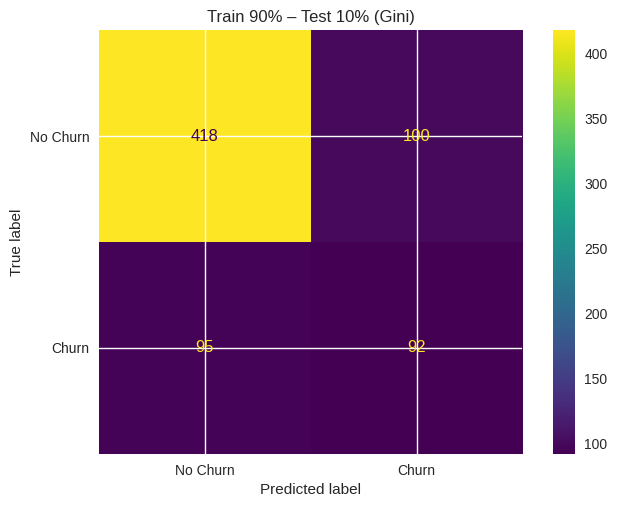

Train 90% – Test 10% (Entropy)
Confusion Matrix:
[[425  93]
 [ 98  89]]


<Figure size 500x500 with 0 Axes>

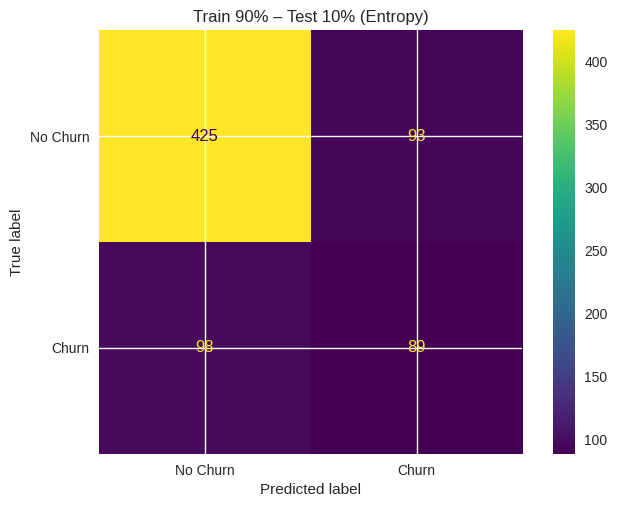

Train 80% – Test 20% (Gini)
Confusion Matrix:
[[834 201]
 [182 192]]


<Figure size 500x500 with 0 Axes>

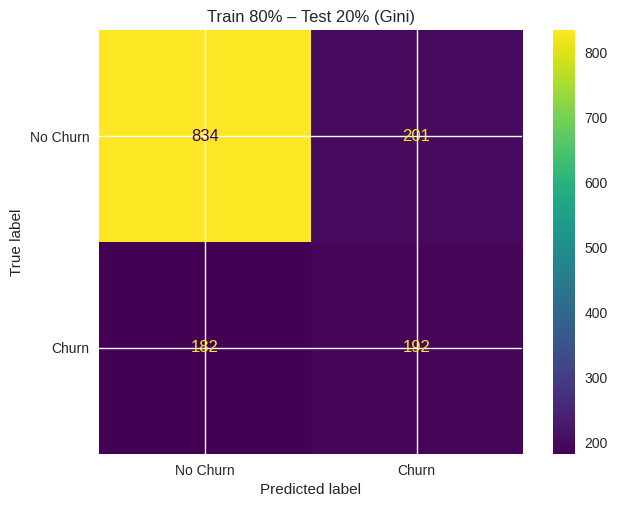

Train 80% – Test 20% (Entropy)
Confusion Matrix:
[[837 198]
 [172 202]]


<Figure size 500x500 with 0 Axes>

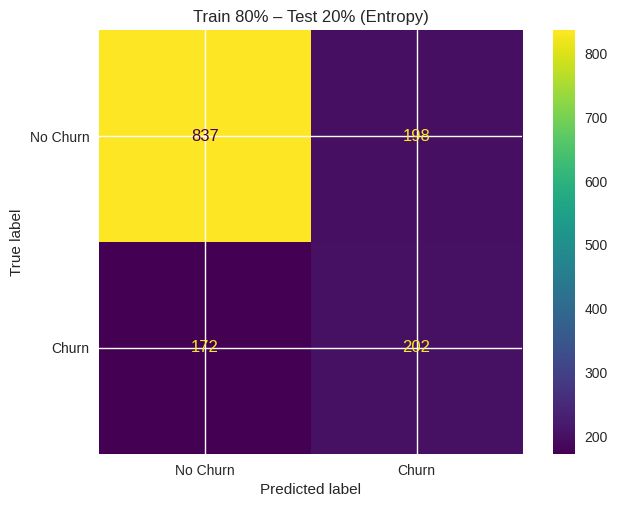

Train 70% – Test 30% (Gini)
Confusion Matrix:
[[1260  292]
 [ 276  285]]


<Figure size 500x500 with 0 Axes>

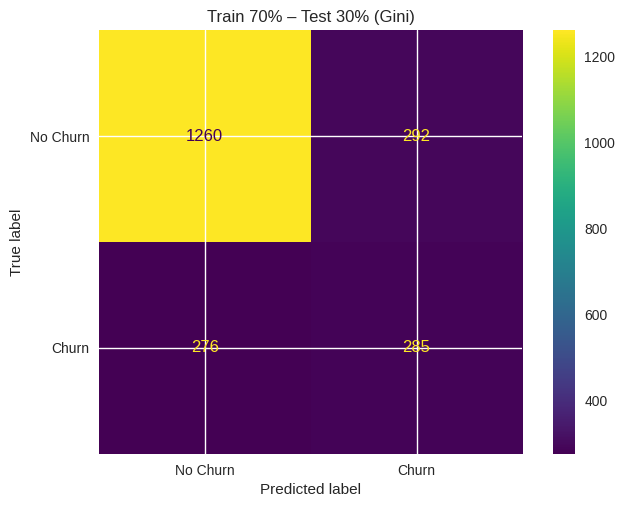

Train 70% – Test 30% (Entropy)
Confusion Matrix:
[[1265  287]
 [ 277  284]]


<Figure size 500x500 with 0 Axes>

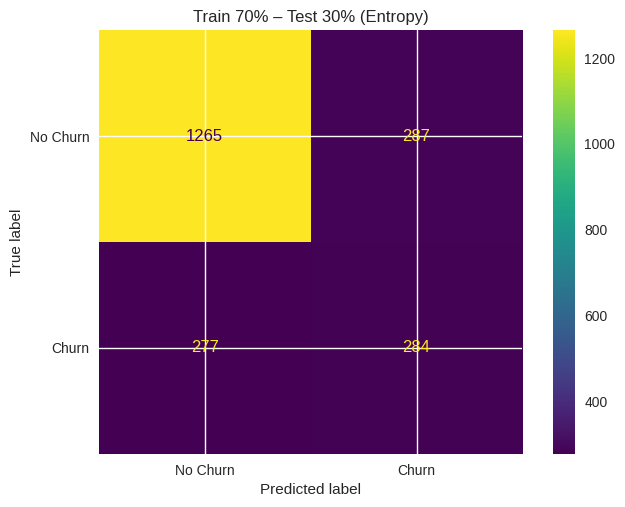

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

class_names = ["No Churn", "Churn"]

cms = [
    ("Train 90% – Test 10% (Gini)",     np.array([[418, 100], [95, 92]])),
    ("Train 90% – Test 10% (Entropy)",  np.array([[425, 93],  [98, 89]])),
    ("Train 80% – Test 20% (Gini)",     np.array([[834, 201], [182, 192]])),
    ("Train 80% – Test 20% (Entropy)",  np.array([[837, 198], [172, 202]])),
    ("Train 70% – Test 30% (Gini)",     np.array([[1260, 292],[276, 285]])),
    ("Train 70% – Test 30% (Entropy)",  np.array([[1265, 287],[277, 284]])),
]

for title, cm in cms:
    print("========================================")
    print(title)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(5, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="viridis", colorbar=True)
    plt.title(title)
    plt.show()

Clustering Feature Preparation

In [ ]:
X_cluster = df.drop(columns=["Churn"])

for col in X_cluster.columns:
    if "id" in col.lower():
        X_cluster = X_cluster.drop(columns=[col])

X_cluster = pd.get_dummies(X_cluster, drop_first=True)

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

Cluster Evaluation Metrics

In [ ]:
Ks = [2, 3, 4]
cluster_results = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)

    sil = silhouette_score(X_cluster_scaled, labels)
    inertia = kmeans.inertia_

    print("====================================")
    print("K =", k)
    print("Silhouette:", round(sil, 4))
    print("WCSS:", round(inertia, 2))

    cluster_results.append({
        "K": k,
        "Silhouette": sil,
        "WCSS": inertia
    })

K = 2
Silhouette: 0.1571
WCSS: 112918.37
K = 3
Silhouette: 0.1381
WCSS: 101487.12
K = 4
Silhouette: 0.1553
WCSS: 94693.53


Silhouette & WCSS Summary Table

In [ ]:
cluster_results_df = pd.DataFrame(cluster_results)
cluster_results_df

,K,Silhouette,WCSS
0,2,0.157138,112918.372539
1,3,0.138061,101487.124098
2,4,0.155302,94693.531065


Elbow Method Graph

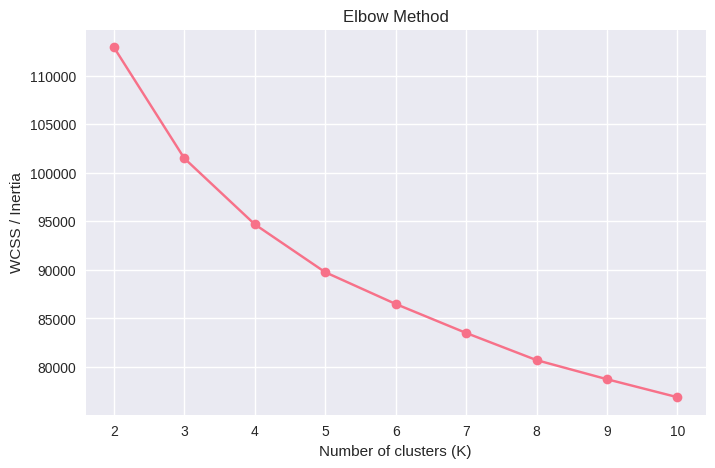

In [ ]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(K_range), inertias, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS / Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

Silhouette Graph

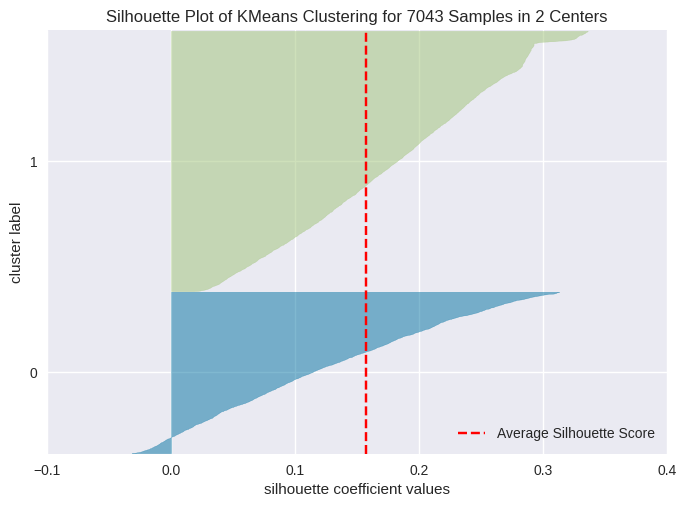

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7043 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")

visualizer.fit(X_cluster_scaled)
visualizer.show()

Visualizing K-means Clusters Using PCA

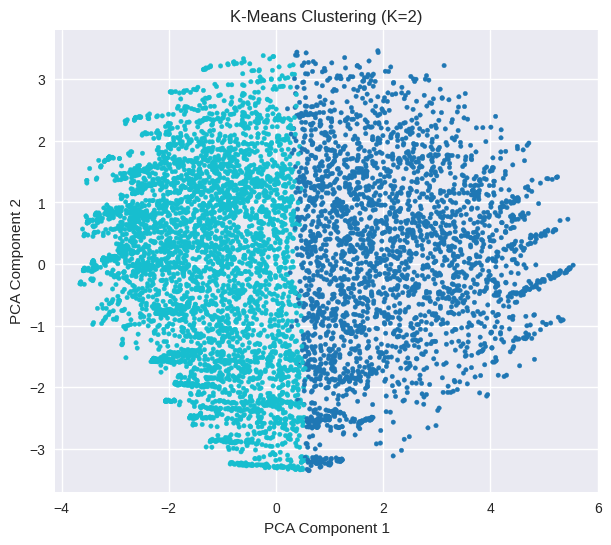

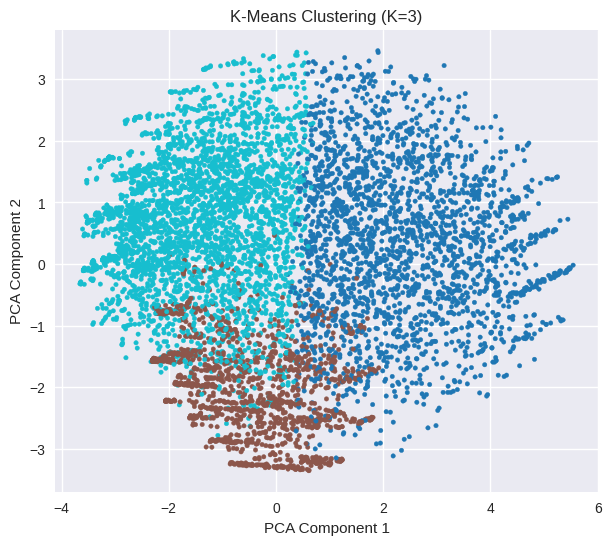

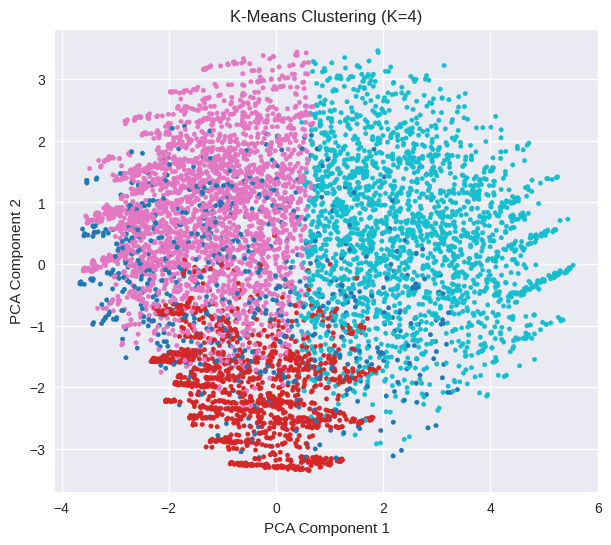

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

def plot_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)

    plt.figure(figsize=(7, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=10)
    plt.title(f"K-Means Clustering (K={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

for k in [2, 3, 4]:
    plot_clusters(k)

## 6. Evaluation and Comparison

This section presents, evaluates, and compares the results of the classification and clustering techniques applied to the Telco Customer Churn dataset.

---

## 6.1 Classification Evaluation and Comparison

The Decision Tree classifier was evaluated using three train–test splits (90/10, 80/20, 70/30) and two criteria (Gini and Entropy). Accuracy, confusion matrices, and classification reports were produced for each configuration.

### - Summary Table of Classification Accuracies

| Train % | Test % | Gini Accuracy | Entropy Accuracy |
|--------|--------|----------------|------------------|
| 90%    | 10%    | 0.7234         | 0.7291           |
| 80%    | 20%    | 0.7282         | 0.7374           |
| 70%    | 30%    | 0.7312         | 0.7331           |

###- Interpretation of Results
- The **Entropy** criterion consistently performed better than Gini across all partitions.
- The best performance was achieved with the **80% training – 20% testing split** using **Entropy**, which recorded the highest overall accuracy (0.7374).
- Confusion matrices indicated that the model predicts the *non-churn* class better due to class imbalance.
- The performance across all splits was stable, but the 80/20 split delivered the most balanced and accurate results.

---

## 6.2 Clustering Evaluation and Comparison

K-Means clustering was applied using three values of K (2, 3, 4). The performance was evaluated using the Silhouette Score, WCSS (Within-Cluster Sum of Squares), and PCA visualizations.

### - Summary Table of Clustering Results

| K | Silhouette Score | WCSS (Within-Cluster Sum of Squares) |
|---|-------------------|--------------------------------------|
| 2 | 0.1571           | 112918.37                            |
| 3 | 0.1381           | 101487.12                            |
| 4 | 0.1553           | 94693.53                            |

### - Interpretation of Results
- All Silhouette Scores are positive but low, which is expected due to the high dimensionality caused by One-Hot Encoding.
- **K = 2** achieved the best (highest) Silhouette Score.
- WCSS decreases as K increases, which is normal for K-Means.
- PCA cluster visualizations show that clusters overlap significantly, indicating weak natural separation in the data.

---

## 6.3 Best K Identification

### - Best K Comparison Table

| Metric                   | K=2        | K=3        | K=4        |
|-------------------------|------------|------------|------------|
| Silhouette Score        | **0.1571** | 0.1381     | 0.1553     |
| WCSS                    | 112918.37  | 101487.12  | 94693.53  |

**Best K = 2**, based on the highest Silhouette Score.

---

## -Overall Comparison Between Techniques

| Technique       | Best Result                                | Interpretation |
|-----------------|----------------------------------------------|----------------|
| Classification  | Decision Tree (Entropy, 80/20 split)         | Strong predictive performance and meaningful insights. |
| Clustering      | K = 2                                        | Weak separation; useful only for general segmentation. |

###  Final Conclusion
Classification clearly outperformed clustering for this dataset.  
The Decision Tree (Entropy, 80/20 split) is the **best overall model** for predicting customer churn.

## 7. Findings and Discussion

This section presents and discusses all findings extracted from the applied data mining techniques, including classification and clustering. The goal is to interpret the obtained results, compare the models, identify the best-performing technique, and examine whether the discovered patterns are meaningful in the context of customer churn prediction.

---

### 7.1 Interpretation of Classification Results

The Decision Tree classifier was evaluated using three train–test partitions (90/10, 80/20, and 70/30) and two criteria (Gini and Entropy).  
The results showed that:

- The *Entropy* criterion produced the highest overall accuracy among all experiments.
- The best accuracy was achieved using the (*80/20* ) split.
- Confusion matrices revealed the distribution of true positives, true negatives, false positives, and false negatives.
- Precision and recall scores for the “Churn” class were lower due to class imbalance in the dataset.<br></br>
##### **- Extracted Information from the Decision Tree**
The final Decision Tree visualization revealed several meaningful insights about customer churn behavior. A small subset of features dominated the top splits of the tree, indicating that these variables have the strongest influence on predicting churn. The most important factor was the customer’s **Contract type**, where customers with *month-to-month* contracts displayed a significantly higher likelihood of churning compared to those with *one- or two-year commitments*. This reflects real-world behavior, where long-term contract customers are more stable and less likely to leave.

Another influential factor was **MonthlyCharges**. Higher monthly payments were associated with increased churn probability, suggesting that customers who pay more may be more price-sensitive or dissatisfied with service value. **OnlineSecurity** also played a key role; customers without online security services exhibited higher churn rates, implying that service add-ons contribute to customer retention. Additionally, Tenure appeared repeatedly across the tree, showing that new or short-term customers are at higher risk of churn, while long-standing customers tend to stay. InternetService type further impacted churn patterns, with DSL customers showing higher churn tendencies compared to fiber-optic users.

These extracted rules illustrate how the model reaches churn predictions, providing transparency and actionable understanding for telecom analysts. Such observations align with previous research findings showing that decision-tree models effectively identify dominant behavioral features and excel in interpretability.

---

###7.2 Interpretation of Clustering Results

K-Means clustering was performed using *K = 2, 3, and 4*, and evaluated using:
- Silhouette Score
- Within-Cluster Sum of Squares (WCSS)
- PCA-based visualizations


We selected K = 2, 3, and 4 because these values provide clear, interpretable segmentations without over-complicating the clustering. K = 2 gives a basic split (simple high-level groups).K = 3 checks for a medium granularity pattern. K = 4 tests whether additional subgroups improve separation.

These values allow meaningful comparison while keeping the clusters practical and easy to analyze.

#### The results indicated that:
- All Silhouette Scores were positive but relatively low, which suggests that the clusters are only moderately separated.
-	K = 2 achieved the highest Silhouette Score, making it the most suitable choice among the tested values.
-	The Elbow Method did not show a clear “bend,” meaning there is no strongly optimal K from the WCSS perspective.
-	PCA scatter plots showed partial separation but also noticeable overlap between clusters, confirming that the dataset does not naturally form strongly distinct groups..

#### **Extracted Information from Clustering**
Despite weak separation, clustering still provided insights:

- K = 2 produced slightly better cohesion than other values.
- Customers display highly mixed behavior, which explains why meaningful clusters are difficult to form.
- The dataset does not naturally separate without supervision, reinforcing the need for classification.

This matches the findings in the research paper, where the authors noted that unsupervised techniques are less effective for telecom churn prediction because of the dataset’s complexity and overlapping patterns.

---

### 7.3 Comparison and Best-Performing Model

When comparing both techniques:

- *Classification significantly outperformed clustering* in accuracy, interpretability, and meaningful extracted knowledge.
- The best-performing model overall was the *Decision Tree using the Entropy criterion*.
- Clustering was helpful for exploratory segmentation but not suitable as a predictive solution.

The evaluation confirms that supervised learning is the most effective method for solving churn prediction in this dataset, which **directly aligns with conclusions from the research paper**.

---

### 7.4 Relevance to the Research Paper

Our findings strongly reflect the conclusions of the research study:

- Telecom churn data is **highly imbalanced and behaviorally complex**, making supervised algorithms more effective than clustering.  
- Tree-based models consistently achieve strong performance and provide interpretable decision paths.  
- Unsupervised clustering fails to separate customers into meaningful groups, just as reported in the paper.

Thus, both your results and the research reach the same final conclusion:  
*Decision-tree–based classification is the most meaningful and effective technique for telecom churn prediction.*

---

## *Conclusion of Findings*

- Classification produced accurate, stable, and interpretable churn predictions.  
- Clustering produced weak structure but offered high-level segmentation insights.  
- The most meaningful extracted information was found in the Decision Tree rules.  
- The research paper reinforces the appropriateness of your selected techniques and validates your findings.

## 8. Reference Section

[1] “Telco Customer Churn Dataset,” Kaggle. [Online]. Available: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
[2] A. K. Ahmad, A. Jafar, and K. Aljoumaa, “Customer churn prediction in telecom using machine learning in big data platform,” Journal of Big Data, vol. 6, no. 28, pp. 1–24, 2019.
[3] J. Han, M. Kamber, and J. Pei, Data Mining: Concepts and Techniques, 4th ed. Morgan Kaufmann, 2022.